# Hands-on Exercise Normalization & Standardization

In [10]:
# Importing needed libraries
import pandas as pd
pd.set_option('display.max_columns', None)

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

### Source: https://www.kaggle.com/datasets/joebeachcapital/loan-default

In [11]:
data = pd.read_csv('Anonymize_Loan_Default_data.csv',encoding='latin1', index_col=0)
data

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,repay_fail
2,2,2,0.0,0.0,0.00000,36 months,0.00,0.00,< 1 year,RENT,0.0,Not Verified,Dec-99,Charged Off,major_purchase,000xx,ZZ,0.00,0.0,Jan-01,0.0,NaN,0.0,0.0,0.0,0.00%,1.0,0.000000,0.00,0.00,0.00,Jan-07,0.00,Jan-07,Jan-07,1
3,545583,703644,2500.0,2500.0,2500.00000,36 months,13.98,85.42,4 years,RENT,20004.0,Not Verified,Jul-10,Does not meet the credit policy. Status:Fully ...,other,487xx,MI,19.86,0.0,Aug-05,5.0,NaN,7.0,0.0,981.0,21.30%,10.0,3075.291779,3075.29,2500.00,575.29,Jul-13,90.85,Aug-13,Jun-16,0
4,532101,687836,5000.0,5000.0,5000.00000,36 months,15.95,175.67,4 years,RENT,59000.0,Not Verified,Jun-10,Charged Off,debt_consolidation,115xx,NY,19.57,0.0,Apr-94,1.0,59.0,7.0,0.0,18773.0,99.90%,15.0,2948.760000,2948.76,1909.02,873.81,Nov-11,175.67,NaN,Mar-12,1
5,877788,1092507,7000.0,7000.0,7000.00000,36 months,9.91,225.58,10+ years,MORTGAGE,53796.0,Not Verified,Sep-11,Fully Paid,other,751xx,TX,10.80,3.0,Mar-98,3.0,3.0,7.0,0.0,3269.0,47.20%,20.0,8082.391880,8082.39,7000.00,1082.39,Mar-14,1550.27,NaN,Mar-14,0
6,875406,1089981,2000.0,2000.0,2000.00000,36 months,5.42,60.32,10+ years,RENT,30000.0,Not Verified,Sep-11,Fully Paid,debt_consolidation,112xx,NY,3.60,0.0,Jan-75,0.0,72.0,7.0,0.0,0.0,0%,15.0,2161.663244,2161.66,2000.00,161.66,Feb-14,53.12,NaN,Jun-16,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38476,849205,1060907,3000.0,3000.0,3000.00000,36 months,11.99,99.63,3 years,RENT,74250.0,Verified,Aug-11,Fully Paid,credit_card,805xx,CO,22.17,0.0,Jan-00,2.0,NaN,12.0,0.0,16550.0,73.50%,22.0,3586.619764,3586.62,3000.00,586.62,Aug-14,100.30,NaN,Jun-16,0
38477,852914,1065048,10400.0,10400.0,10400.00000,36 months,13.49,352.88,9 years,RENT,62000.0,Source Verified,Aug-11,Fully Paid,credit_card,442xx,OH,11.57,0.0,Apr-99,1.0,NaN,21.0,0.0,16898.0,39.70%,33.0,12703.534030,12703.53,10400.00,2303.53,Sep-14,393.08,NaN,Jun-16,0
38478,519553,671637,16000.0,10550.0,10531.35818,60 months,14.96,250.77,10+ years,MORTGAGE,95088.0,Source Verified,May-10,Fully Paid,debt_consolidation,073xx,NJ,10.63,0.0,Dec-95,1.0,NaN,9.0,1.0,10386.0,62.20%,25.0,14202.267530,14163.31,10550.00,3652.27,Jun-13,5439.96,NaN,Feb-16,0
38479,825638,1034448,10000.0,10000.0,10000.00000,36 months,16.89,355.99,1 year,RENT,48720.0,Not Verified,Jul-11,Fully Paid,debt_consolidation,061xx,CT,18.97,0.0,Jul-07,2.0,NaN,8.0,0.0,7301.0,53.30%,12.0,12815.178320,12815.18,10000.00,2815.18,Aug-14,380.63,NaN,Sep-15,0


### Preprocessing 

In [12]:
# Drop unused columns
columns_to_drop = ['id','member_id', 'issue_d', 'last_pymnt_d', 'last_credit_pull_d', 'earliest_cr_line', 'next_pymnt_d', 'zip_code']
data = data.drop(columns_to_drop, axis=1)

# Remove rows that has missing values
data.dropna(inplace=True)

# Dataset size
print('Dataset shape:',data.shape)

# Conversion
data['revol_util'] = data['revol_util'].str.strip('%').astype(float)
data['term'] = data['term'].str.extract('(\d+)').astype(int)
data['emp_length'] = data['emp_length'].str.extract('(\d+)').astype(float)

Dataset shape: (13779, 28)


In [13]:
# Label Encoding
label_encoder = LabelEncoder()
categorical_cols = ['home_ownership', 'verification_status', 'purpose', 'addr_state', 'loan_status']
for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])

In [14]:
scaler = StandardScaler()
numeric_cols = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs',
'inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
                'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'last_pymnt_amnt', 'term', 'emp_length']
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])

### Data Analysis

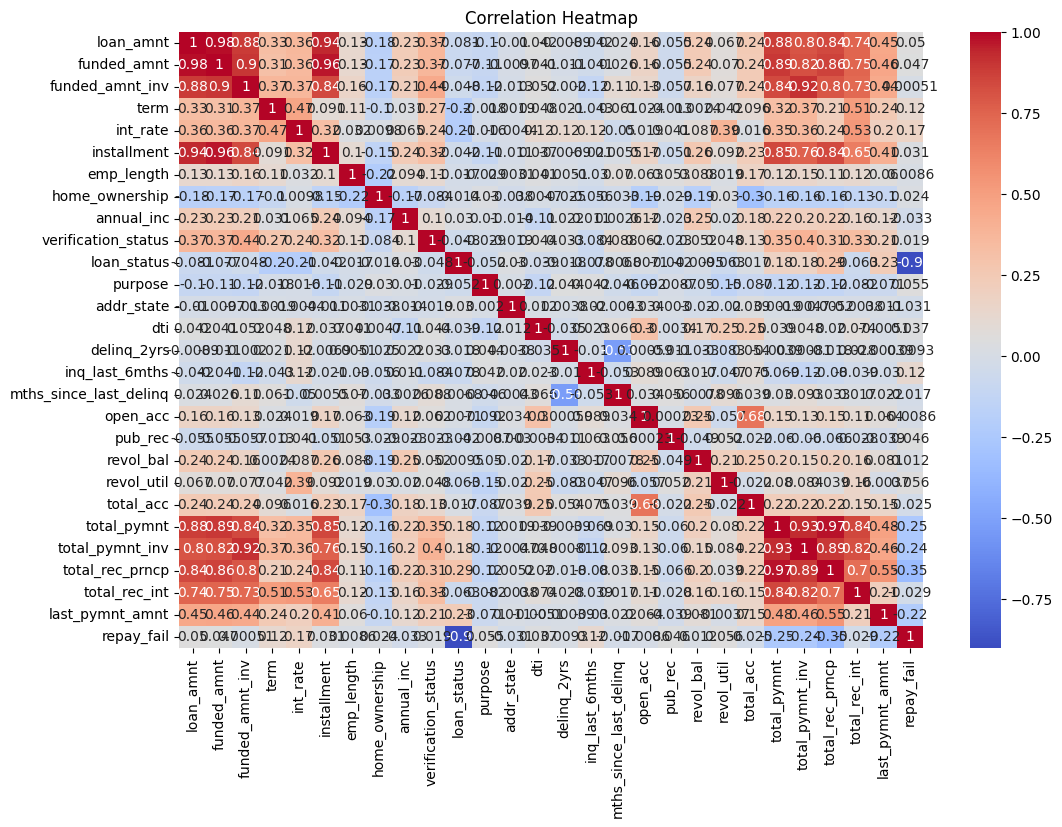

In [15]:
# Split the data into features (X) and target (y)
X = data
y = data['repay_fail']

# Explore correlations
plt.figure(figsize=(12, 8))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

X = data
X = X.drop('repay_fail', axis=1)

### Model Training and Evaluation

In [16]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### ANN from tensorflow

In [17]:
ann = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=27, activation='relu'),   # Input layer
    tf.keras.layers.Dense(units=13, activation='tanh'),   # Hidden layer
    tf.keras.layers.Dense(units=6, activation='tanh'),   # Hidden layer
    tf.keras.layers.Dense(units=1, activation='sigmoid') # Output layer
])
ann.compile(optimizer = 'adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])
ann.fit(X_train, y_train, batch_size = 16, epochs = 30)

Epoch 1/30
689/689 [==============================] - 0s 304us/step - loss: 0.2465 - accuracy: 0.9144
Epoch 2/30
689/689 [==============================] - 0s 302us/step - loss: 0.0830 - accuracy: 0.9745
Epoch 3/30
689/689 [==============================] - 0s 293us/step - loss: 0.0528 - accuracy: 0.9827
Epoch 4/30
689/689 [==============================] - 0s 302us/step - loss: 0.0422 - accuracy: 0.9868
Epoch 5/30
689/689 [==============================] - 0s 295us/step - loss: 0.0363 - accuracy: 0.9887
Epoch 6/30
689/689 [==============================] - 0s 291us/step - loss: 0.0314 - accuracy: 0.9907
Epoch 7/30
689/689 [==============================] - 0s 295us/step - loss: 0.0289 - accuracy: 0.9908
Epoch 8/30
689/689 [==============================] - 0s 290us/step - loss: 0.0263 - accuracy: 0.9921
Epoch 9/30
689/689 [==============================] - 0s 290us/step - loss: 0.0242 - accuracy: 0.9928
Epoch 10/30
689/689 [==============================] - 0s 297us/step - loss: 0.022

### Predictions and Evaluation

In [18]:

y_pre = ann.predict(X_test)
y_pred = (y_pre > 0.5)

cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix:')
print(cm)
print(classification_report(y_test, y_pred, target_names=["repay success","repay fail"], digits= 4))

87/87 [==============================] - 0s 242us/step
Confusion matrix:
[[2278    3]
 [   9  466]]
               precision    recall  f1-score   support

repay success     0.9961    0.9987    0.9974      2281
   repay fail     0.9936    0.9811    0.9873       475

     accuracy                         0.9956      2756
    macro avg     0.9948    0.9899    0.9923      2756
 weighted avg     0.9956    0.9956    0.9956      2756

